In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from google.colab import files

In [25]:
uploaded = files.upload()
Glass_Data = pd.read_excel("glass.xlsx", sheet_name="glass")
print(Glass_Data.head())

Saving glass.xlsx to glass (5).xlsx
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [26]:
Glass_Data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [27]:
Glass_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [28]:
Glass_Data.isna().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


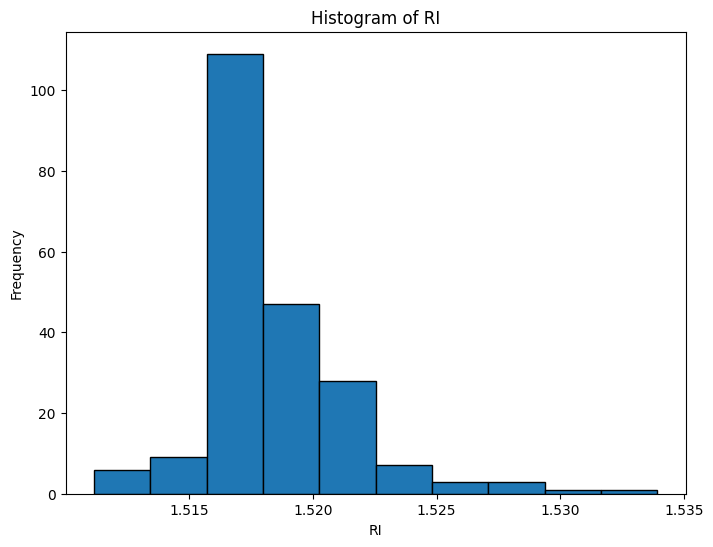

In [29]:
import matplotlib.pyplot as plt
column_to_plot = 'RI'

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(Glass_Data[column_to_plot], bins=10, edgecolor='black')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_to_plot}')
plt.show()

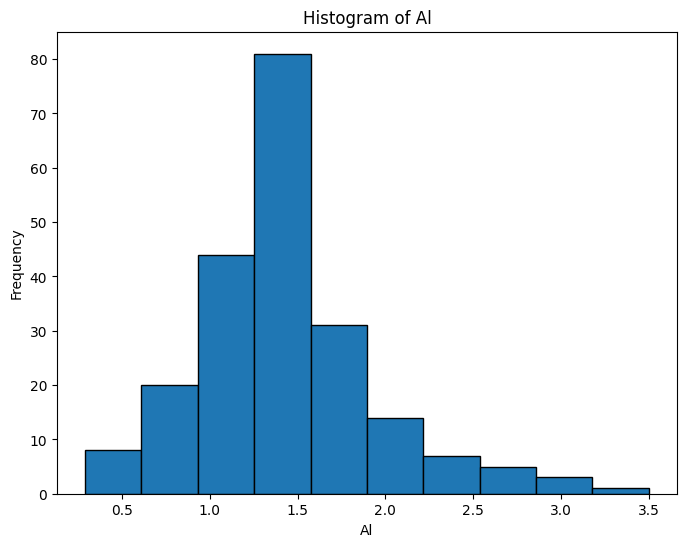

In [30]:
column_to_plot = 'Al'

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(Glass_Data[column_to_plot], bins=10, edgecolor='black')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_to_plot}')
plt.show()

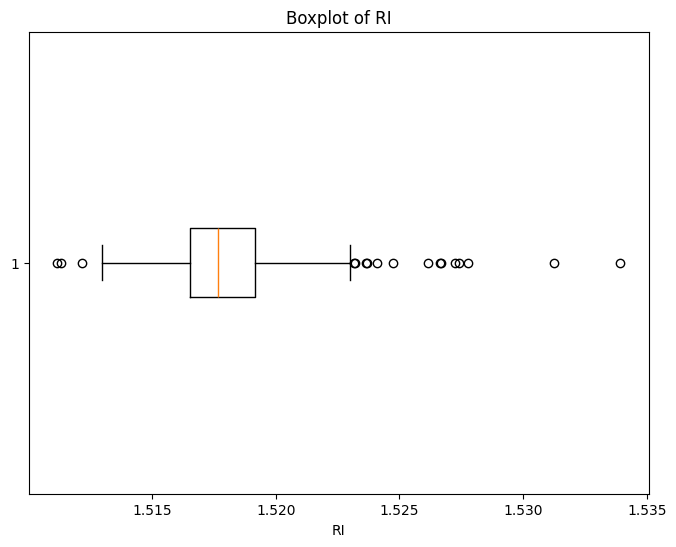

In [31]:
# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(Glass_Data['RI'], vert=False)
plt.xlabel('RI')
plt.title('Boxplot of RI')
plt.show()

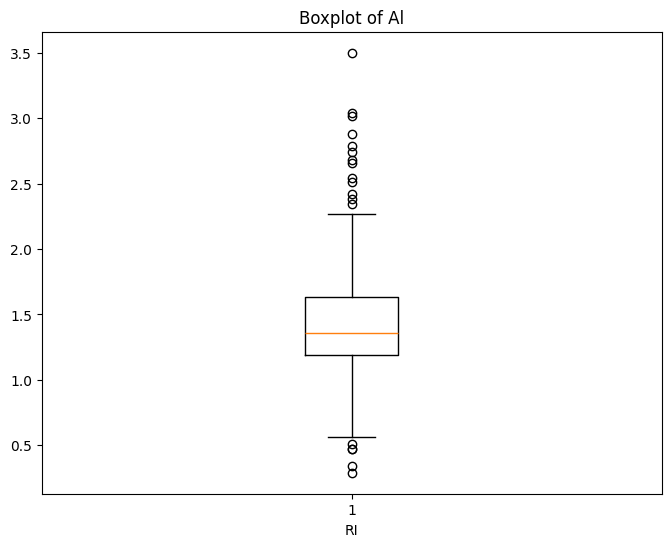

In [32]:
# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(Glass_Data['Al'], vert=True)
plt.xlabel('RI')
plt.title('Boxplot of Al')
plt.show()

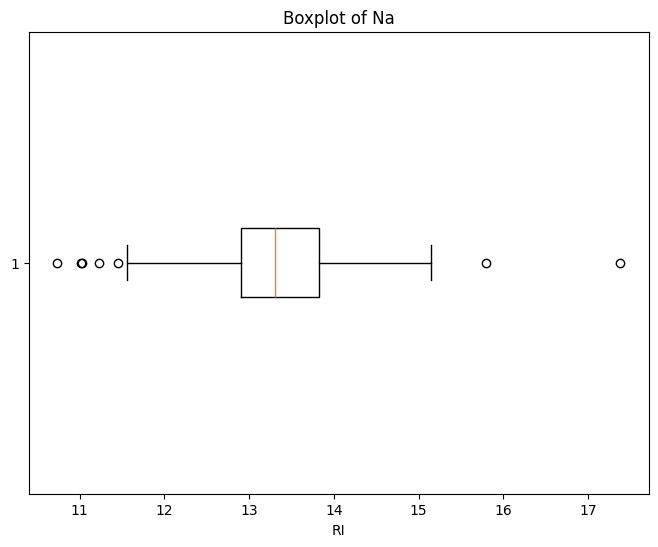

In [33]:
# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(Glass_Data['Na'], vert=False)
plt.xlabel('RI')
plt.title('Boxplot of Na')
plt.show()

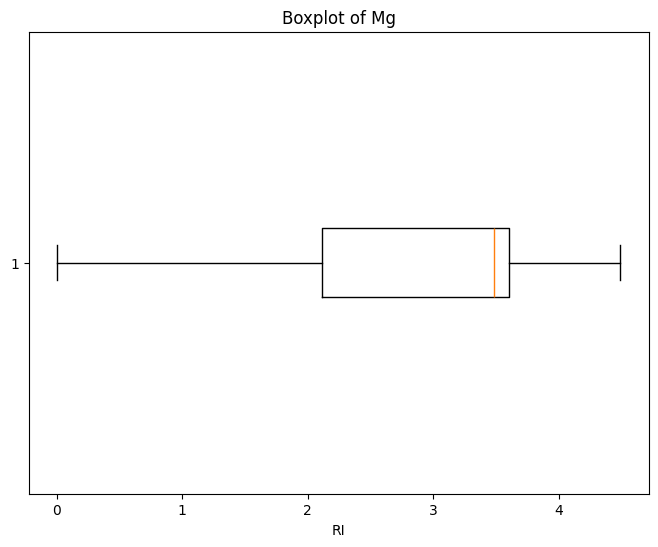

In [34]:
# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(Glass_Data['Mg'], vert=False)
plt.xlabel('RI')
plt.title('Boxplot of Mg')
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier

X = Glass_Data.drop('Type', axis=1)
y = Glass_Data['Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)



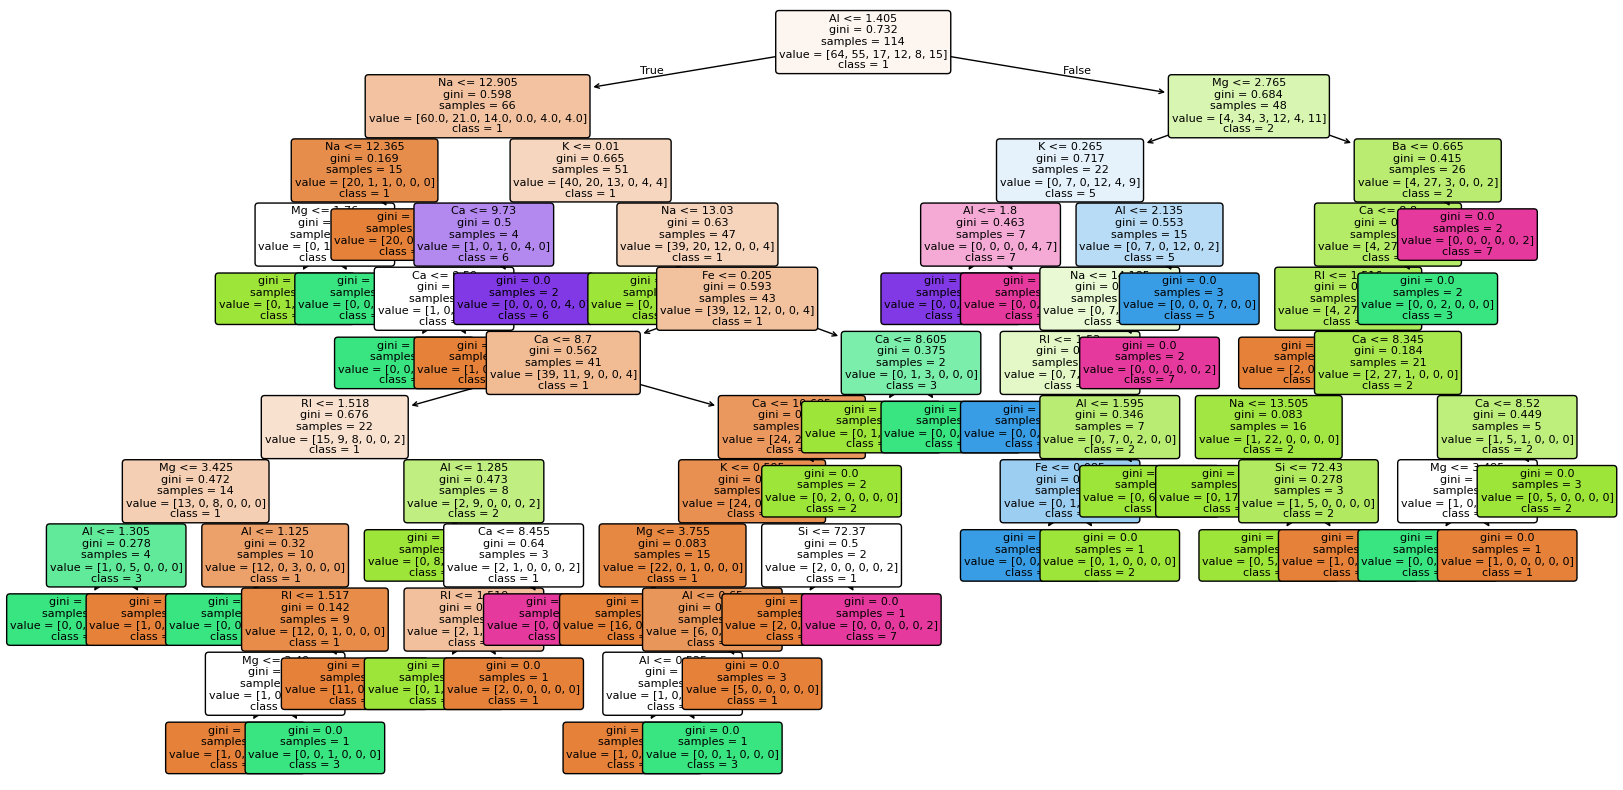

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(rf_classifier.estimators_[0],
          feature_names=X.columns,
          class_names=y.unique().astype(str),
          filled=True,
          rounded=True,
          fontsize=8)
plt.show()

In [36]:
# Evaluate the model
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.866828165374677
Recall: 0.8372093023255814
F1-score: 0.8330452594474481


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the Bagging model
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print(f"Bagging Classifier - Precision: {precision_bagging}")
print(f"Bagging Classifier - Recall: {recall_bagging}")
print(f"Bagging Classifier - F1-score: {f1_bagging}")

print(f"Random Forest - Precision: {precision}")
print(f"Random Forest - Recall: {recall}")
print(f"Random Forest - F1-score: {f1}")